In [39]:
import time
import yaml
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_path = "/Users/xiafei/code/normal_original_dataset_with_features_no_flow_interval.csv"

In [4]:
df = pd.read_csv(dataset_path, index_col=None, header=0)

In [6]:
df.head()

,traffic_class_name,application_name,flow_id_src_ip,flow_id_src_port,flow_id_dst_ip,flow_id_dst_port,flow_id_transport_protocol,packet_count,bits_speed,packets_average_payload,...,packets_payload_var,packets_payload_std,packets_payload_median,packets_inter_arrival_time_min,packets_inter_arrival_time_max,packets_inter_arrival_time_mean,packets_inter_arrival_time_var,packets_inter_arrival_time_std,packets_inter_arrival_time_median,flow_duration
0,chat,aim,131.202.240.87,1258,64.12.104.73,443,TCP,0.142857,0.000035,0.137931,...,0.000000,0.000000,0.148297,1.000000,0.299990,0.499760,0.024998,0.158108,0.749964,0.802881
1,chat,aim,131.202.240.87,1254,64.12.104.85,443,TCP,0.976190,0.000177,0.147542,...,0.017680,0.132968,0.186373,0.000673,0.135514,0.091091,0.006004,0.077486,0.064591,1.000000
2,chat,aim,64.12.104.73,443,131.202.240.87,1258,TCP,0.142857,0.000017,0.000000,...,0.000000,0.000000,0.012024,0.999979,0.299988,0.499758,0.024998,0.158107,0.749959,0.802879
3,chat,aim,64.12.104.85,443,131.202.240.87,1254,TCP,1.000000,0.000195,0.167697,...,0.053347,0.230969,0.012024,0.000019,0.135512,0.088918,0.005959,0.077197,0.062137,0.999947
4,chat,aim,131.202.240.87,13389,64.12.104.73,443,TCP,0.095238,0.000032,0.137931,...,0.000000,0.000000,0.148297,0.999965,0.299988,0.599723,0.022500,0.149998,1.000000,0.642317


In [8]:
df['target_str'] = df['traffic_class_name'] +'-'+ df['application_name']
df.head()

,traffic_class_name,application_name,flow_id_src_ip,flow_id_src_port,flow_id_dst_ip,flow_id_dst_port,flow_id_transport_protocol,packet_count,bits_speed,packets_average_payload,...,packets_payload_std,packets_payload_median,packets_inter_arrival_time_min,packets_inter_arrival_time_max,packets_inter_arrival_time_mean,packets_inter_arrival_time_var,packets_inter_arrival_time_std,packets_inter_arrival_time_median,flow_duration,target_str
0,chat,aim,131.202.240.87,1258,64.12.104.73,443,TCP,0.142857,0.000035,0.137931,...,0.000000,0.148297,1.000000,0.299990,0.499760,0.024998,0.158108,0.749964,0.802881,chat-aim
1,chat,aim,131.202.240.87,1254,64.12.104.85,443,TCP,0.976190,0.000177,0.147542,...,0.132968,0.186373,0.000673,0.135514,0.091091,0.006004,0.077486,0.064591,1.000000,chat-aim
2,chat,aim,64.12.104.73,443,131.202.240.87,1258,TCP,0.142857,0.000017,0.000000,...,0.000000,0.012024,0.999979,0.299988,0.499758,0.024998,0.158107,0.749959,0.802879,chat-aim
3,chat,aim,64.12.104.85,443,131.202.240.87,1254,TCP,1.000000,0.000195,0.167697,...,0.230969,0.012024,0.000019,0.135512,0.088918,0.005959,0.077197,0.062137,0.999947,chat-aim
4,chat,aim,131.202.240.87,13389,64.12.104.73,443,TCP,0.095238,0.000032,0.137931,...,0.000000,0.148297,0.999965,0.299988,0.599723,0.022500,0.149998,1.000000,0.642317,chat-aim


In [10]:
df_columns = df.columns
df_columns[7:]

Index(['packet_count', 'bits_speed', 'packets_average_payload',
       'packets_payload_min', 'packets_payload_max', 'packets_payload_mean',
       'packets_payload_var', 'packets_payload_std', 'packets_payload_median',
       'packets_inter_arrival_time_min', 'packets_inter_arrival_time_max',
       'packets_inter_arrival_time_mean', 'packets_inter_arrival_time_var',
       'packets_inter_arrival_time_std', 'packets_inter_arrival_time_median',
       'flow_duration', 'target_str'],
      dtype='object')

In [19]:
dataset = df[df_columns[7:]]
dataset.head()

,packet_count,bits_speed,packets_average_payload,packets_payload_min,packets_payload_max,packets_payload_mean,packets_payload_var,packets_payload_std,packets_payload_median,packets_inter_arrival_time_min,packets_inter_arrival_time_max,packets_inter_arrival_time_mean,packets_inter_arrival_time_var,packets_inter_arrival_time_std,packets_inter_arrival_time_median,flow_duration,target_str
0,0.142857,0.000035,0.137931,0.148297,0.050595,0.137931,0.000000,0.000000,0.148297,1.000000,0.299990,0.499760,0.024998,0.158108,0.749964,0.802881,chat-aim
1,0.976190,0.000177,0.147542,0.000000,0.225446,0.147542,0.017680,0.132968,0.186373,0.000673,0.135514,0.091091,0.006004,0.077486,0.064591,1.000000,chat-aim
2,0.142857,0.000017,0.000000,0.012024,0.000000,0.000000,0.000000,0.000000,0.012024,0.999979,0.299988,0.499758,0.024998,0.158107,0.749959,0.802879,chat-aim
3,1.000000,0.000195,0.167697,0.012024,0.336310,0.167697,0.053347,0.230969,0.012024,0.000019,0.135512,0.088918,0.005959,0.077197,0.062137,0.999947,chat-aim
4,0.095238,0.000032,0.137931,0.148297,0.050595,0.137931,0.000000,0.000000,0.148297,0.999965,0.299988,0.599723,0.022500,0.149998,1.000000,0.642317,chat-aim


In [22]:
dataset['target_code'] = pd.factorize(dataset['target_str'])[0]
# drop the values
dataset = dataset.drop(['target_str'], axis='columns')
 
# print the dataframe
dataset.head(-5)

/var/folders/mz/6rxglfys69n4qtjdzbb9mtyc0000gn/T/ipykernel_48435/3617016084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['target_code'] = pd.factorize(dataset['target_str'])[0]


,packet_count,bits_speed,packets_average_payload,packets_payload_min,packets_payload_max,packets_payload_mean,packets_payload_var,packets_payload_std,packets_payload_median,packets_inter_arrival_time_min,packets_inter_arrival_time_max,packets_inter_arrival_time_mean,packets_inter_arrival_time_var,packets_inter_arrival_time_std,packets_inter_arrival_time_median,flow_duration,target_code
0,0.142857,0.000035,0.137931,0.148297,0.050595,0.137931,0.000000,0.000000,0.148297,1.000000e+00,0.299990,0.499760,2.499808e-02,0.158108,7.499637e-01,0.802881,0
1,0.976190,0.000177,0.147542,0.000000,0.225446,0.147542,0.017680,0.132968,0.186373,6.726507e-04,0.135514,0.091091,6.004055e-03,0.077486,6.459067e-02,1.000000,0
2,0.142857,0.000017,0.000000,0.012024,0.000000,0.000000,0.000000,0.000000,0.012024,9.999791e-01,0.299988,0.499758,2.499784e-02,0.158107,7.499589e-01,0.802879,0
3,1.000000,0.000195,0.167697,0.012024,0.336310,0.167697,0.053347,0.230969,0.012024,1.893382e-05,0.135512,0.088918,5.959338e-03,0.077197,6.213714e-02,0.999947,0
4,0.095238,0.000032,0.137931,0.148297,0.050595,0.137931,0.000000,0.000000,0.148297,9.999649e-01,0.299988,0.599723,2.249955e-02,0.149998,1.000000e+00,0.642317,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312777,0.000000,0.000000,0.004592,0.041463,0.000410,0.004592,0.000000,0.000000,0.006324,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,18
312778,0.000000,0.000000,0.004592,0.041463,0.000410,0.004592,0.000000,0.000000,0.006324,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,18
312779,0.000000,0.000000,0.004592,0.041463,0.000410,0.004592,0.000000,0.000000,0.006324,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,18
312780,0.000000,0.000000,0.096710,0.873171,0.008629,0.096710,0.000000,0.000000,0.133185,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,18


In [31]:
# random forest
def random_forest(X_train, y_train, X_test, y_test, show=False, estimators=100):
    last_time = time.time()
    rf = RandomForestClassifier(n_estimators=estimators, max_depth=None, min_samples_split=2, random_state=0)

    rf.fit(X_train, y_train)
    middle_time = time.time()

    y_pred = rf.predict(X_test)

    current_time = time.time()
    print("n_estimators: %d" % estimators)
    print("RF Accuracy: %.2f" % accuracy_score(y_test, y_pred))
    print("train time： {}".format(middle_time - last_time))
    print("test time： {}".format(current_time - middle_time))
    if show:
        cm = confusion_matrix(y_test, y_pred)
        print('confusion matrix rf:')
        print(cm)
        print('classification report rf:')
        print(classification_report(y_test, y_pred))
    
    return rf

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

column = dataset.columns

X = dataset[column[:-1]]
y = dataset[column[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.head()

,packet_count,bits_speed,packets_average_payload,packets_payload_min,packets_payload_max,packets_payload_mean,packets_payload_var,packets_payload_std,packets_payload_median,packets_inter_arrival_time_min,packets_inter_arrival_time_max,packets_inter_arrival_time_mean,packets_inter_arrival_time_var,packets_inter_arrival_time_std,packets_inter_arrival_time_median,flow_duration
191788,0.000018,0.000015,0.001061,0.047393,0.000460,0.001061,0.0,0.0,0.001294,0.001274,0.000898,0.001274,0.0,0.0,0.001274,0.000816
142725,0.000003,0.000010,0.025144,0.031008,0.006126,0.025144,0.0,0.0,0.024230,0.000086,0.000082,0.000086,0.0,0.0,0.000086,0.000082
268140,0.000004,0.000336,0.022335,0.041534,0.007720,0.022335,0.0,0.0,0.017751,0.000117,0.000105,0.000117,0.0,0.0,0.000117,0.000104
55809,0.000004,0.000902,0.001606,0.015361,0.000373,0.001606,0.0,0.0,0.003720,0.000076,0.000070,0.000076,0.0,0.0,0.000076,0.000070
156954,0.000003,0.000008,0.004191,0.005168,0.001021,0.004191,0.0,0.0,0.004038,0.000085,0.000081,0.000085,0.0,0.0,0.000085,0.000080


In [27]:
X_test.head()

,packet_count,bits_speed,packets_average_payload,packets_payload_min,packets_payload_max,packets_payload_mean,packets_payload_var,packets_payload_std,packets_payload_median,packets_inter_arrival_time_min,packets_inter_arrival_time_max,packets_inter_arrival_time_mean,packets_inter_arrival_time_var,packets_inter_arrival_time_std,packets_inter_arrival_time_median,flow_duration
24424,0.000004,0.001164,0.009638,0.046083,0.002241,0.009638,0.0,0.0,0.011161,0.000078,0.000072,0.000078,0.0,0.0,0.000078,0.000071
60620,0.000004,0.000881,0.001606,0.015361,0.000373,0.001606,0.0,0.0,0.003720,0.000078,0.000072,0.000078,0.0,0.0,0.000078,0.000072
277425,0.000004,0.000260,0.003723,0.020234,0.001287,0.003723,0.0,0.0,0.002959,0.000115,0.000103,0.000115,0.0,0.0,0.000115,0.000102
276933,0.000000,0.000000,0.066074,0.091587,0.022837,0.066074,0.0,0.0,0.052515,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
164491,0.000003,0.000008,0.009429,0.011628,0.002297,0.009429,0.0,0.0,0.009086,0.000085,0.000081,0.000085,0.0,0.0,0.000085,0.000081


In [28]:
y_train.head()

191788    10
142725     8
268140    14
55809      3
156954     8
Name: target_code, dtype: int64

In [29]:
y_test.head()

24424      3
60620      3
277425    14
276933    14
164491     8
Name: target_code, dtype: int64

In [34]:
rf = random_forest(X_train, y_train, X_test, y_test, show=True)

n_estimators: 100
RF Accuracy: 1.00
train time： 18.861364126205444
test time： 0.44628000259399414
confusion matrix rf:
[[   73     0     2     0     3     1     2     0     0     0     0     0
      1     0     2     0     0     0     0]
 [    2    93     4     0     3     0     1     0     0     0     0     0
      0     0     0     0     0     1     0]
 [    0     0  1611     0     0     0     0     0     0     0     0     0
      1     0     1     0     1     0     0]
 [    0     0     2 16216     0     0     0     0    13     0     2     0
      0     1     3     0     0     3     0]
 [    0     2     1     1   122     0     7     2     0     0     1     0
      3     2     2     0     0     0     1]
 [    1     0     0     0     0   290     0     0     1     0     2     1
      3     1     0     0     1     1     1]
 [    0     0     0     0     7     0   165     2     0     0     0     0
      1     0     0     0     0     0     1]
 [    2     0     2     0     3     0     2   10

In [37]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:30]
# Print the feature ranking
print("Feature ranking:")
print(indices)
feature_columns = column[indices]
print(feature_columns)
print(importances[indices])

Feature ranking:
[14  9  0  1 15  3  4  8 10  5  2 11 13  7  6 12]
Index(['packets_inter_arrival_time_median', 'packets_inter_arrival_time_min',
       'packet_count', 'bits_speed', 'flow_duration', 'packets_payload_min',
       'packets_payload_max', 'packets_payload_median',
       'packets_inter_arrival_time_max', 'packets_payload_mean',
       'packets_average_payload', 'packets_inter_arrival_time_mean',
       'packets_inter_arrival_time_std', 'packets_payload_std',
       'packets_payload_var', 'packets_inter_arrival_time_var'],
      dtype='object')
[0.14948574 0.13148658 0.13055782 0.10209822 0.07805253 0.06654138
 0.05993986 0.05852369 0.05726003 0.05349005 0.05033445 0.04348663
 0.00707046 0.00410154 0.00404402 0.00352699]


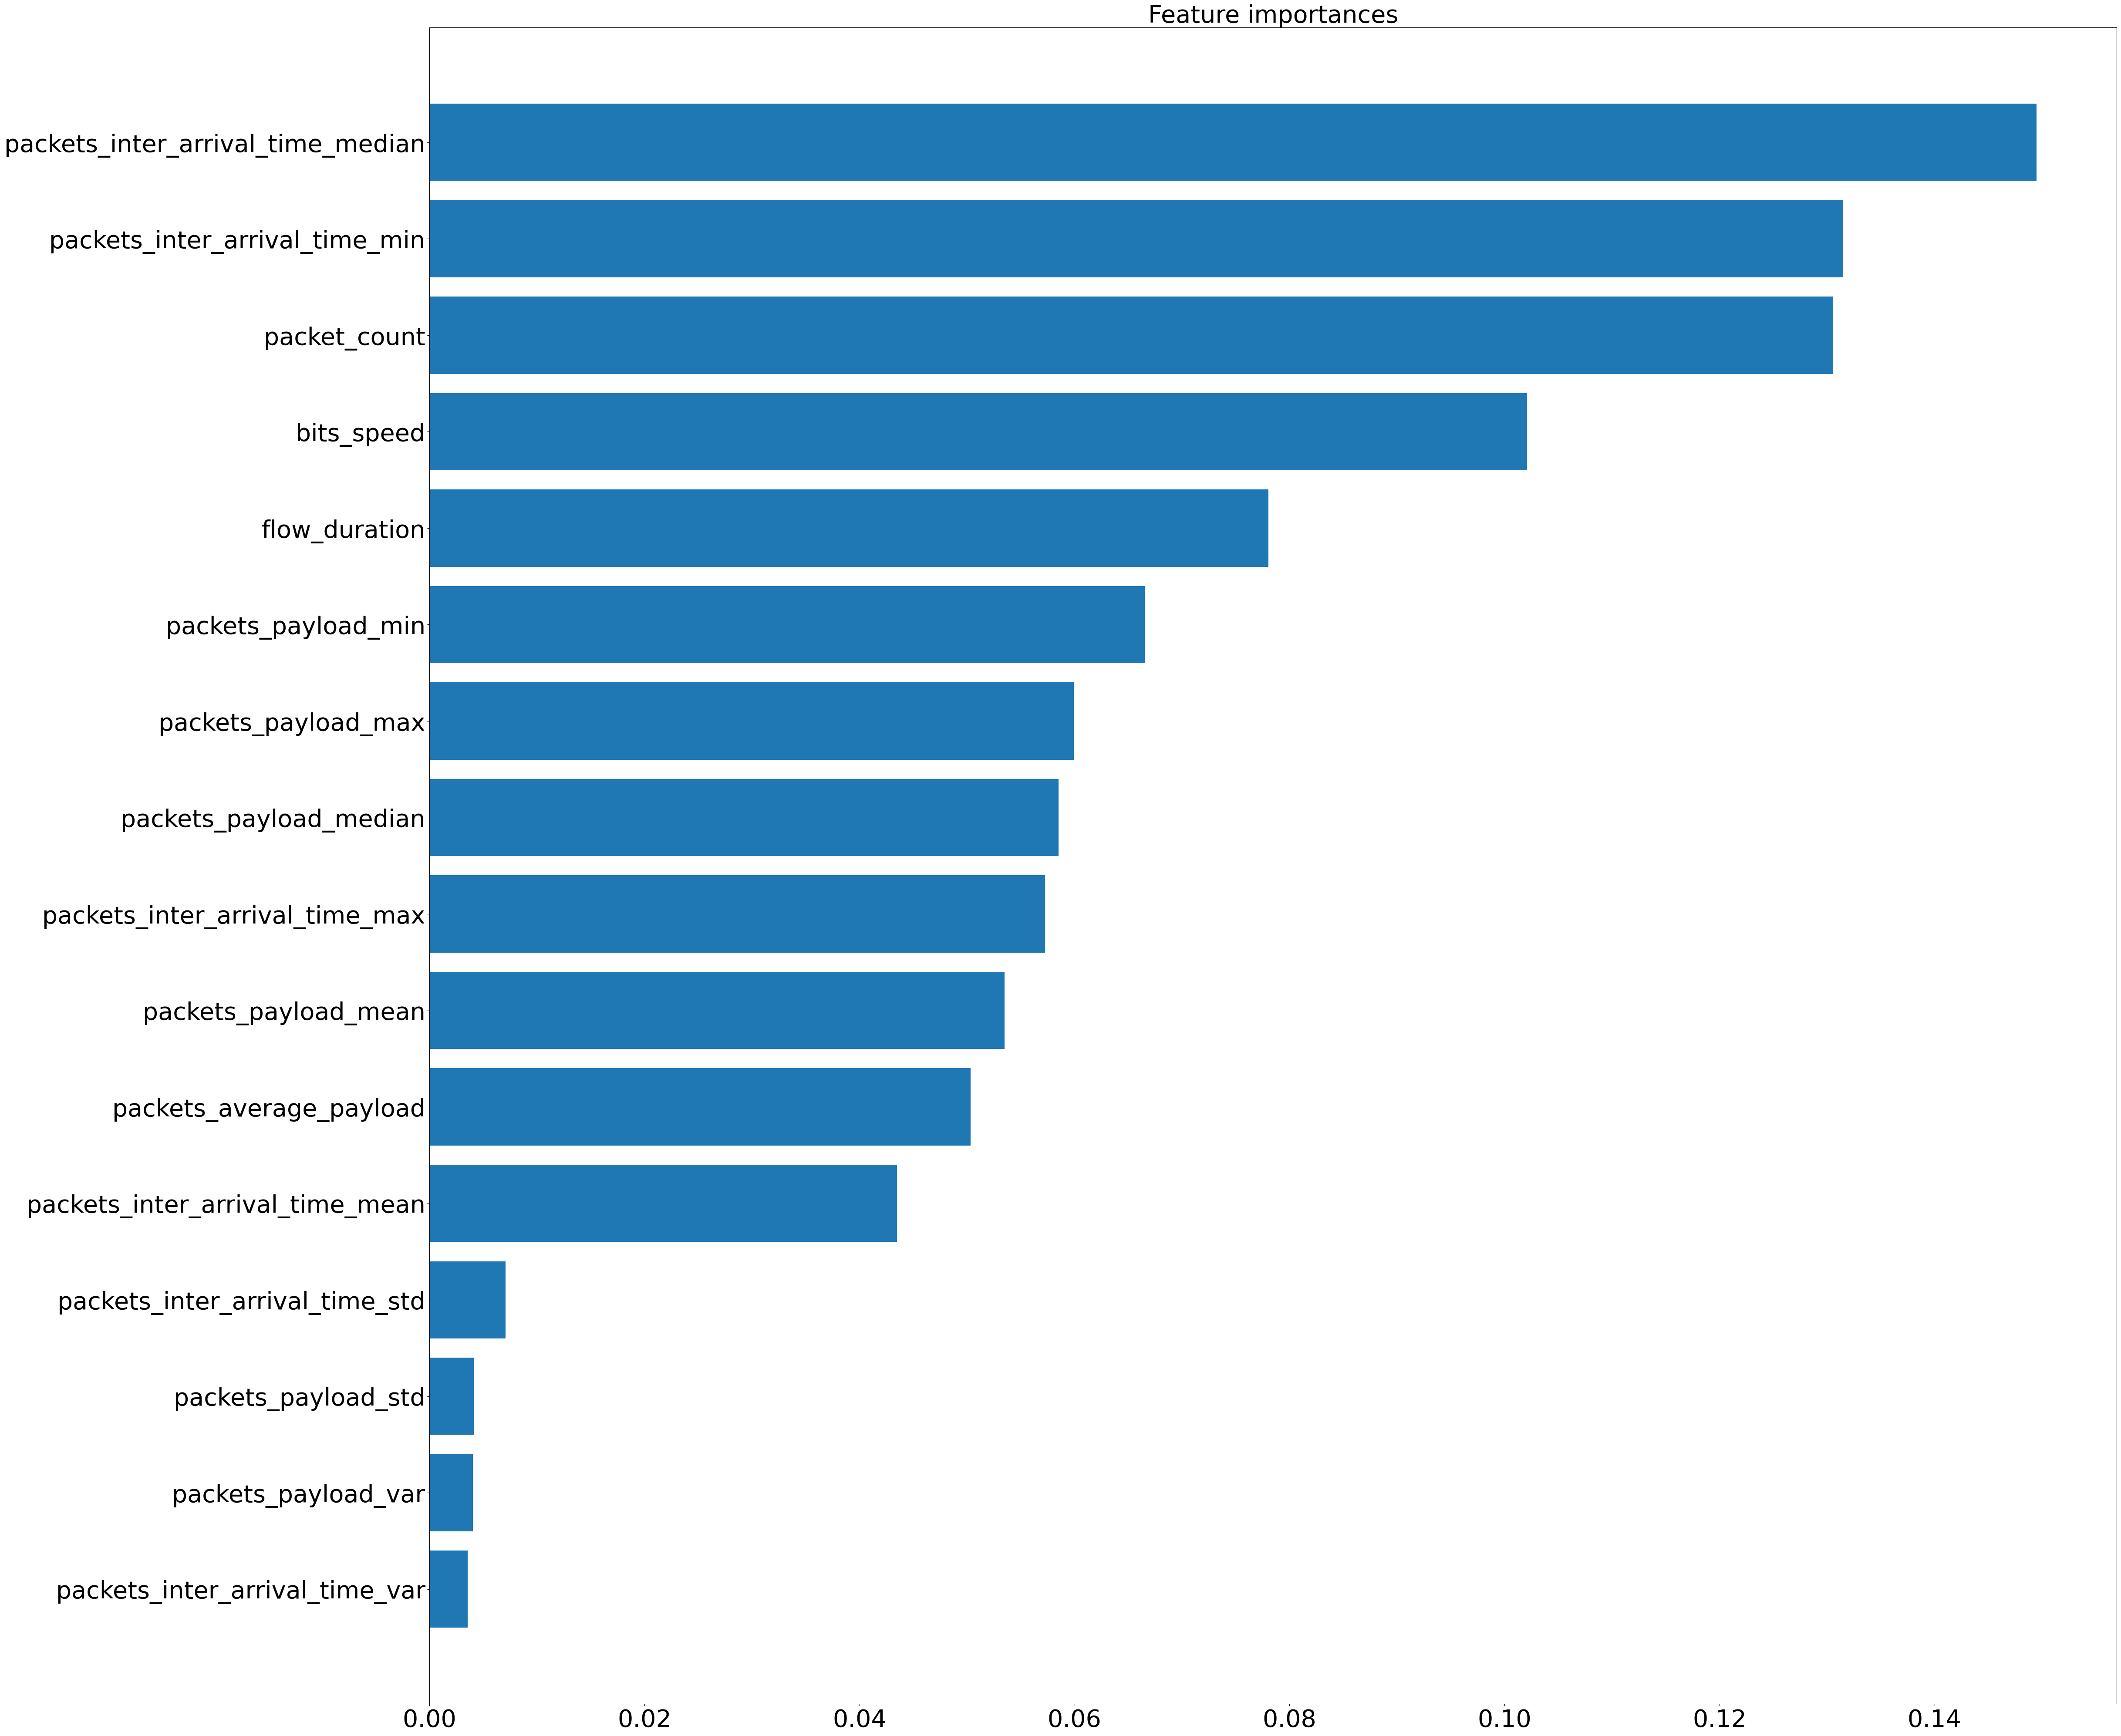

In [40]:
plt.subplots(figsize=(50, 50))
plt.title("Feature importances", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.barh(feature_columns[::-1], importances[indices][::-1])
plt.show()